In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import nltk
#nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from textstat.textstat import textstat
from matplotlib.table import Table
from scipy.stats import multivariate_normal, invwishart
from abc import ABC, abstractmethod
%matplotlib inline

In [2]:
df = pd.read_csv('raw_dataset - Sheet3.csv')

In [3]:
df

index                                              title  \
0       1                   The Marcoses' three-body problem   
1       2           State of the opposition: Worth dying for   
2       3                     Elon Musk and magical thinking   
3       4            So what's wrong with Marcos's F1 party?   
4       5           Patricia Evangelista and writing the war   
5       6                      What do we do about Alice Guo   
6       7                         The media is not the press   
7       8                               The paradoxical pope   
8       9  What's next for VP Sara: Go Macapagal or go Ar...   
9      10     Time to negotiate peace again with the CPP-NPA   
10     11                Corruption and the Gen Z revolution   
11     12                                       With a smile   
12     13                                          Exit plan   
13     14   PUV modernization: To suspend or not to suspend?   
14     15                        A celebration of friendship   
15     16                               Our uncanny politics   
16     17      MVP on journalism, AI and the brave new world   
17     18                                        Agriculture   
18     19                     Notes on PLDT’s budget overrun   
19     20                        ‘Business as usual at NAIA’   
20     21               [OPINION] Fighting the virus of lies   
21     22            Thinking and adapting with Michael Webb   
22     23  [ANALYSIS] Facebook let my government target m...   
23     24           Remembering teachers who shape our lives   
24     25  [OPINION] The role of America’s social media p...   
25     26  [OPINION] Help define how our democracy will s...   
26     27                   #CourageON: Defending our rights   
27     28                    [ANALYSIS] Technology’s tsunami   
28     29  [ANALYSIS] As democracy dies, we build a globa...   
29     30              [OPINION] How Lighthouse gave us hope   
30     31       How to add 0.88 ppts to GDP, 600,000 to jobs   
31     32  How not to corrupt otherworldly sports icons (...   
32     33  How not to corrupt otherworldly sports icons (...   
33     34               ‘Sana’ in SONA: Controlled inflation   
34     35  Central bank independence according to the IMF...   
35     36  Central bank independence according to the IMF...   
36     37                   Delivering on good credit rating   
37     38                    Good for political equilibrium?   
38     39                      Scripting in the time of POGO   
39     40                       ₱58-₱59 per dollar: Déjà vu?   
40     41                              The lessons of August   
41     42                             Ghost to golden August   
42     43                     Our young – today and tomorrow   
43     44                          Unavoidable consequences    
44     45                                Terrain and weather   
45     46                    Filipinos: Designated Survivors   
46     47                                 Beyond my lifetime   
47     48               A Philippine Myth: Quality Education   
48     49                        Looking back, looking ahead   
49     50                                 Questioning myself   
50     51             Disaster risk management and SDG goals   
51     52  PhilHealth Funds: How to add 0.88 ppts to GDP,...   
52     53                Impossible to build fiscal buffers?   
53     54                       Going beyond arbitral ruling   
54     55                     Keeping our nerves on the peso   
55     56            Facing El Niño: Tell that to Mang Nato!   
56     57  BSP’s steady monetary policy: Going easy on ea...   
57     58  Eating and getting ‘A’ credit rating, once more\n   
58     59                  Zacchaeus, a metaphor of our time   
59     60          Quiboloy’s case: The dark side of ‘faith’   

                 author                                               text  \
0             John Ne

In [4]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    return text

# Feature extraction function
def extract_features(text):
    # Tokenize words and sentences
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    
    # Exclude special characters from word count but retain them in the text
    # Count only alphabetic tokens as words
    word_count = len([word for word in words if word.isalpha()])
    
    # Calculate phraseology features
    avg_word_length = np.mean([len(word) for word in words if word.isalpha()]) if word_count > 0 else 0
    avg_sentence_length = word_count / len(sentences) if len(sentences) > 0 else 0
    
    # Calculate punctuation features
    punctuation_count = sum(1 for char in text if char in ['.', ',', ':', ';', '?', '!', '-', '\'', '\"'])
    punctuation_ratio = punctuation_count / word_count if word_count > 0 else 0
    
    # Calculate linguistic diversity features
    vocab_size = len(set([word for word in words if word.isalpha()]))
    vocab_ratio = vocab_size / word_count if word_count > 0 else 0
    
    return {
        'word_count': word_count,
        'sentence_count': len(sentences),
        'avg_word_length': avg_word_length,
        'avg_sentence_length': avg_sentence_length,
        'punctuation_count': punctuation_count,
        'punctuation_ratio': punctuation_ratio,
        'vocab_size': vocab_size,
        'vocab_ratio': vocab_ratio
    }

In [5]:
# Apply preprocessing and feature extraction to each text sample
df['preprocessed_text'] = df['text'].apply(preprocess_text)
df_features = df.apply(lambda row: extract_features(row['preprocessed_text']), axis=1).apply(pd.Series)
df = pd.concat([df, df_features], axis=1)

In [6]:
X = df[['word_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_ratio', 'vocab_size', 'vocab_ratio']]
y = df['author']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifier (Random Forest in this case)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\cotpl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cotpl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cotpl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [7]:
def classify_new_text(new_text, model):
    # Preprocess the text
    preprocessed_text = preprocess_text(new_text)
    
    # Extract features from the new text
    new_features = extract_features(preprocessed_text)
    
    # Convert the features into a DataFrame row (to match training data format)
    new_features_df = pd.DataFrame([new_features])
    
    # Select only the columns that were used during training
    selected_features = ['word_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_ratio', 'vocab_size', 'vocab_ratio']
    new_features_df = new_features_df[selected_features]
    
    # Predict the author using the trained model
    predicted_author = model.predict(new_features_df)
    
    return predicted_author[0]

In [8]:
# #new_text = "Even the most talented scriptwriters of the best Netflix series would probably find their jaws dropping in bewilderment and shock with all the plot twists in this seemingly never-ending Alice in Wonderland fairytale, Manila edition. It’s as bizarre as it can get. Here is Alice, back in Manila via a private jet after being caught by Indonesian authorities, still making a mockery of our institutions, our law-enforcement agencies, our Immigration policies and our Senate. Alice told a Senate panel on Monday that they left the country via a yacht which they boarded right in the City of Manila. However, she isn’t very sure which part of the Manila harbor – the busiest port in the country – they departed from. This is the latest script that’s being fed to everyone following this edge-of-your seat drama. It’s different from the first version which said that they left on a small boat from Pangasinan. Either she is lying to keep the narrative confusing or she’s really hopelessly and impossibly bizarre. The truth is, our senators may never be able to fully unmask Alice Guo or to really squeeze the whole truth from her. However, it’s not a futile investigation. It has, in fact, led to policy changes, including a ban on Philippine offshore gaming operations. But more importantly, this whole Alice in Wonderland saga is pointing to a very disturbing reality in the Philippines, which our authorities must immediately address. I’m talking about the existence of syndicates issuing fake birth certificates and fake passports or illegally issuing such legitimate documents. This is appalling, disturbing and most of all a treachery to our people and our country. This is a serious security concern and each and every Filipino who is involved in this crime is a traitor of the worst kind and must be dealt with as such. In ancient Greece, high treason was punished severely, including the loss of citizenship for oneself and family. Here in our country today, these traitors among us must be brought to justice. Imagine what could happen if our official documents are forged, bootlegged or sold illegally. Never mind the fact that the most ordinary of ordinary Filipinos need to spend hours if not days just to get their official documents – whether it’s a birth certificate, a passport or a driver’s license. Years ago, for example, I remember a domestic helper who missed her flight to Malaysia because she could not get a passport. Why? Because she needed two government IDs but she only had one, a Philippine Postal ID. Her employer had to enroll her in a driving school so she could get a driver’s license, which would then serve as her second ID so she could get a passport. But by then it was too late. But as I said, never mind that. Filipinos are used to incompetence anyway. What is more disturbing, however, is the impact of this on our security. If our passports and birth certificates can easily be acquired illegally for a song, the same goes for land registration titles and other crucial documents. We may wake up one day and a big portion of our country is already owned by foreigners who managed to produce fake IDs or fake land titles in acquiring properties. We must also guard our borders because as Alice Guo has clearly shown, it’s so easy to escape the country, especially with our porous borders unguarded. Security is made worse by the fact that border patrols and immigration authorities just conveniently look the other way to help fugitives escape the law. What is our society, really, but a tale of dark comedy in continuous motion, if not an edge-of-your seat Netflix series playing in a loop over and over. If this Alice in Wonderland saga would help solve one thing, let it be this problem of fake documents and ID mills. For instance, there is supposedly a fake birth certificate factory in Davao, catering to mostly Chinese nationals. Such treacherous activities are alarming and President Marcos should not allow this to continue right under his nose. Unless we bring these perpetrators to justice and quash the syndicates they work for, we may remain a nation of fools and traitors. Our country is a stark and sad reminder of how greed, selfishness and betrayal have, time and time again, sold this nation’s soul. On the lighter side, “Fernando Zóbel: The Future of the Past” has arrived in Asia, premiering at the Ayala Museum after a four-month run at the Museo Nacional del Prado in Madrid. The exhibit will feature more than 200 works by the painter Zóbel, including sketchbooks that have never been seen by the public. I missed the vernissage but I was told that the exhibit will run until 2025, in celebration of Ayala Corp.’s 190th founding anniversary, the 100th birth anniversary of Zobel and the 50th anniversary of Ayala Museum."
# new_text = """No, this is not about inflation being driven by the growth of the money supply as Nobel Laureate Milton Friedman talked about it in India in 1963. That inflation is always and everywhere a monetary phenomenon is true in the long run during episodes of persistent inflation. In the short run supply shocks could also affect prices.

# And whether we like it or not, everyone complains when prices of basic commodities and services are soaring, but when this happens for extended period, everyone is more than worried because inflation eats into his income and living standard. That’s why central banks have to manage inflation by regulating monetary growth or adjust interest rate to influence nominal spending and ensure price stability. In some countries, they focus on the exchange rate.

# Thus, inflation is so ubiquitous, we always see it and hear it everywhere.

# For instance, we were all elated when the Philippine Statistics Authority reported the 3.9 percent inflation for December 2023, the first time in 22 months to hit the 2 percent-4 percent inflation target. But we were somewhat disappointed because the average inflation for 2023 remained out of bounds for the last two years. Risk-adjusted forecast by the Bangko Sentral ng Pilipinas (BSP) also indicates an out-of-target inflation this year at over 4.0 percent. 

# Two years ago, inflation hogged the business headlines when as early as March 2022, it leaped over the target and never looked back until December 2023. Believing the global shocks were transitory, and the Philippines did not have to consider the US Fed’s tightening moves at the time, the central bank hesitated to adjust the policy rate even as its own forecasts pointed to a breach for that year and the next. Corrosive as it was, the rising inflation reduced the real policy rate to negative, foreign portfolio investment abandoned the domestic capital market and the peso depreciated close to ₱60 to a dollar. 

# Inflation took to task the new governor in July 2022 to do immoderate tightening in an off-cycle monetary policy meeting to compensate for the previous weak monetary response. It was costly because it required more and more frequent interest rate increases to also address the relentless shocks coming from both sides. The new leadership at the BSP beginning July 2023 has to sustain the remaining mopping up operations. 

# With inflation on a downtrend and relatively more favorable forecasts this year and the next, inflation promises to take the back seat to the cause of achieving high growth and regaining fiscal space in the last four and a half years of the Marcos administration. Are we about to achieve price stability, as Allan Greenspan suggested, when expected changes in the general price level do not effectively modify business and household decisions, when we don’t talk about prices even as we spend, or market chatter starts excluding inflation from the list of to-watch indicators?

# Looking back, inflation became a byword towards the end of 2022 and the beginning of last year. By all indications, the President’s pledge to bring down the price of rice to ₱20 a kilo was impossible because one, global rice prices remained elevated; two, cost of production continued to be prohibitive; and three, the issue of logistics and smuggling proved to be a real setback to normalizing rice prices. With its enormous weight on the consumer price index, rice was for a long period, the heavy lifter of inflation. 

# During the same period, onion became the face of inflation in the Philippines. During the Christmas holidays in 2022, onion was priced higher than beef and chicken, escalating by more than 10 times. Even Time observed that the country had to import 22,000 tons of onions to boost the local supply and arrest the stiff climb in onion prices. Reaching ₱600 a kilo, onions were at least 25 percent-50 percent more expensive than beef or pork. At that price, onions were worth more than the minimum wage of non-farm workers in the Philippines. 

# It's not surprising that the President decided to form an inter-agency body to rein in sharp price uptrends of basic commodities and power, and strengthen anti-inflationary initiatives “to improve the economy and quality of life of Filipinos.” This was in March 2023. Although signed in May 2023, Executive Order (EO) 28 formally created the Inter-Agency Committee on Inflation and Market Outlook which would serve as an advisory body to the Economic Development Group on anti-inflation measures. 

# Except for some updates on inflation strategies the Committee intended to undertake, and the NEDA’s reassurance that the government would sustain its support to the most vulnerable sectors to inflation, we find it difficult to extract any more updates on what the inter-agency committee has actually achieved.

# Why, even restful sleep could be disturbed by inflation.

# The President himself admitted that “I lose sleep every night” over inflation. This was in January 2023 when he also indicated his determination “to bring down, to make sure that the inflation starts to come down in the first quarter and things will normalize after that.” Obviously, the President was not impressed because the January 2023 inflation, announced the following month, peaked at 8.7 percent. When he decided to form the inter-agency committee, he must know that inflation in February and March remained high at 8.6 percent and 7.6 percent with rice, onion, garlic and salt hitting the international press for their phenomenal rise.

# But what should worry the President more than his sleepless nights in Malacañang is when the local population continues to be restless and concerned about the government’s failure to arrest inflation.

# At least for the whole year of 2023, Pulse Asia’s periodic surveys consistently indicate that based on the national survey response, majority of Filipinos consider “controlling inflation” the most urgent national concern followed by three other economic concerns: adjusting workers’ pay, providing more jobs and mitigating poverty in the Philippines.

# Inflation, not surprisingly, was also behind the President’s major decline in his approval rating. While 65 percent of the 1,200 respondents approved of his performance in September 2023, this was lower by 15 percentage points from 80 percent in June. 

# We don’t know the mental dynamics in the Palace but it is not far-fetched that this persistent of a scourge as inflation could also be behind the recent shifts in the leadership of some economic agencies. With more upside risks to inflation this year, we may be set to see more."""
# predicted_author = classify_new_text(new_text, clf)

# print(f"The predicted author is: {predicted_author}")

In [9]:
# Hazard function
def constant_hazard(lam, t):
    return 1 / lam

# Predictive model (Gaussian)
class MultivariateGaussianPredictiveModel:
    def __init__(self, mu0, kappa0=1, alpha0=1, beta0=None):
        # mu0 is a vector for the mean of the prior
        # beta0 is a matrix for the covariance of the prior
        self.mu0 = np.array(mu0)
        self.kappa0 = kappa0
        self.alpha0 = alpha0
        self.beta0 = beta0 if beta0 is not None else np.eye(len(mu0))  # Identity matrix if not provided
        
        # Initialize posterior parameters
        self.mu = np.array(mu0)
        self.kappa = kappa0
        self.alpha = alpha0
        self.beta = np.array(self.beta0)

    def update(self, x):
        x = np.array(x)
        self.kappa += 1
        self.mu = (self.kappa * self.mu0 + x) / (self.kappa + 1)
        diff = x - self.mu0
        self.beta += 0.5 * np.outer(diff, diff)  # Update covariance
        self.alpha += 0.5

    def log_predictive(self, x):
        d = len(self.mu0)  # Dimensionality
        x = np.array(x)
        
        # Covariance matrix for predictive distribution
        cov_matrix = (self.beta * (self.kappa + 1)) / (self.alpha * self.kappa)
        cov_det = np.linalg.det(cov_matrix)
        cov_inv = np.linalg.inv(cov_matrix)

        # Multivariate Gaussian log probability
        log_prob = -0.5 * d * np.log(2 * np.pi) - 0.5 * np.log(cov_det) - \
                   0.5 * np.dot((x - self.mu).T, np.dot(cov_inv, (x - self.mu)))
        return log_prob

# Bayesian Online Change Point Detection algorithm
def bocpd(data, hazard_func, predictive_model):
    T = len(data)
    P = np.zeros((T+1, T+1))
    P[0, 0] = 1
    
    max_run_length = []
    
    for t in range(1, T+1):
        hazard = hazard_func(t)
        log_pred_prob = np.array([predictive_model.log_predictive(data[t-1]) for _ in range(t)])
        P[t, 1:t+1] = P[t-1, :t] * np.exp(log_pred_prob) * (1 - hazard)
        P[t, 0] = np.sum(P[t-1, :t] * hazard)
        P[t, :t+1] /= np.sum(P[t, :t+1])
        predictive_model.update(data[t-1])
        max_run_length.append(np.argmax(P[t, :t+1]))
    
    return P, max_run_length

# Detect change points
def detect_change_points(run_length_probs):
    change_points = []
    for t, prob in enumerate(run_length_probs):
        if prob == 0:  # Run length resets, indicating a change
            change_points.append(t)
    return change_points


In [10]:
# Function to extract stylometric features for BOCPD
def extract_stylometric_features_for_bocpd(new_text):
    preprocessed_text = preprocess_text(new_text)
    features = extract_features(preprocessed_text)
    return features

In [11]:
def display_table_with_white_background(dataframe, title):
    # Round numeric values to 2 decimal places
    dataframe = dataframe.round(2)

    fig, ax = plt.subplots(figsize=(12, 4))  # Adjust size as needed
    ax.axis('off')

    table = Table(ax, bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)  # This will set the default font size for the table

    # Set column width and cell height
    col_width = 1.5
    row_height = 0.4
    num_rows, num_cols = dataframe.shape

    # Add table headers
    for i, column in enumerate(dataframe.columns):
        cell = table.add_cell(0, i, width=col_width, height=row_height, text=column, loc='center', facecolor='white', edgecolor='black')
        cell._text.set_fontsize(12)  # Set font size for header

    # Add table data
    for i, row in dataframe.iterrows():
        for j, value in enumerate(row):
            cell = table.add_cell(i + 1, j, width=col_width, height=row_height, text=f"{value:.2f}" if isinstance(value, (int, float)) else value, loc='center', facecolor='white', edgecolor='black')
            cell._text.set_fontsize(10)  # Set font size for data

    ax.add_table(table)
    plt.title(title, fontsize=14, pad=20)
    plt.show()

In [13]:
def detect_change_points_in_text(new_text, author, trained_model):
    # Preprocess and extract features for the new text
    features = extract_features(preprocess_text(new_text))
    
    features_df = pd.DataFrame([features])
    features_df = features_df[['word_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_ratio', 'vocab_size', 'vocab_ratio']]
    
    predicted_author = trained_model.predict(features_df)
    
    if predicted_author[0] != author:
        print(f"Warning: The provided author does not match the predicted author. Using provided author '{author}' for analysis.")
    
    # Extract stylometric features for each sentence
    sentences = sent_tokenize(new_text)
    sentence_features = []
    
    for sentence in sentences:
        preprocessed_sentence = preprocess_text(sentence)
        sentence_feature = extract_features(preprocessed_sentence)
        
        selected_features = [
            sentence_feature['avg_word_length'], 
            sentence_feature['avg_sentence_length'], 
            sentence_feature['punctuation_ratio'], 
            sentence_feature['vocab_ratio']
        ]
        sentence_features.append(selected_features)
    
    sentence_features = np.array(sentence_features)
    
    # Initialize BOCPD model for multivariate data
    hazard_func = lambda t: constant_hazard(250, t)
    initial_mean = np.mean(sentence_features, axis=0)
    initial_covariance = np.cov(sentence_features, rowvar=False)  # Initial covariance matrix
    
    predictive_model = MultivariateGaussianPredictiveModel(mu0=initial_mean, beta0=initial_covariance)
    
    # Run BOCPD on all selected features (multivariate analysis)
    P, max_run_length = bocpd(sentence_features, hazard_func, predictive_model)

    # Detect change points
    changepoints = detect_change_points(max_run_length)

    feature_categories = {
        'phraseology': ['avg_word_length', 'avg_sentence_length'],
        'punctuation': ['punctuation_ratio'],
        'linguistic_diversity': ['vocab_ratio']
    }

    explanations = []
    
    # Initialize counters for category changes
    category_changes = {category: 0 for category in feature_categories.keys()}
    total_changes = {category: 0 for category in feature_categories.keys()}
    
    for idx in changepoints:
        if idx > 0 and idx < len(sentences):
            prev_features = sentence_features[idx - 1]
            curr_features = sentence_features[idx]
            
            feature_changes = []
            for i, feature_name in enumerate(
                ['avg_word_length', 'avg_sentence_length', 'punctuation_ratio', 'vocab_ratio']):
                
                change = curr_features[i] - prev_features[i]
                percentage_change = (change / prev_features[i] * 100) if prev_features[i] != 0 else 0
                
                # Only include positive changes
                if change > 0:
                    category = next((cat for cat, features in feature_categories.items() if feature_name in features), None)
                    
                    if category:
                        category_changes[category] += 1
                        total_changes[category] += 1
                        
                        feature_changes.append({
                            'Feature': feature_name,
                            'Change Value': change,
                            'Category': category
                        })
            
            if feature_changes:  # Only add explanations if there are valid positive changes
                explanation = {
                    'sentence': sentences[idx],
                    'feature_changes': feature_changes
                }
                explanations.append(explanation)
    
    # Display results similarly
    for explanation in explanations:
        print(f"Change detected in sentence: {explanation['sentence']}")
        print("Feature changes:")
        
        table_data = []
        for feature_change in explanation['feature_changes']:
            table_data.append([
                feature_change['Feature'],
                feature_change['Change Value'],
                feature_change['Category']
            ])
        
        change_table = pd.DataFrame(table_data, columns=[
            'Feature', 'Change Value', 'Category'
        ])
        display_table_with_white_background(change_table, "Change Point Detection of Features for this Sentence")

    print("\n--- Percentage of Change by Category ---")
    for category, changes in category_changes.items():
        total_sentences = len(sentences)
        category_percentage = (changes / total_sentences) * 100 if total_sentences > 0 else 0
        print(f"{category.capitalize()}: {category_percentage:.2f}% change detected out of {total_sentences} sentences.")

    return changepoints, explanations

Change detected in sentence: If true, being non-Filipino made it worse, many times over.
Feature changes:


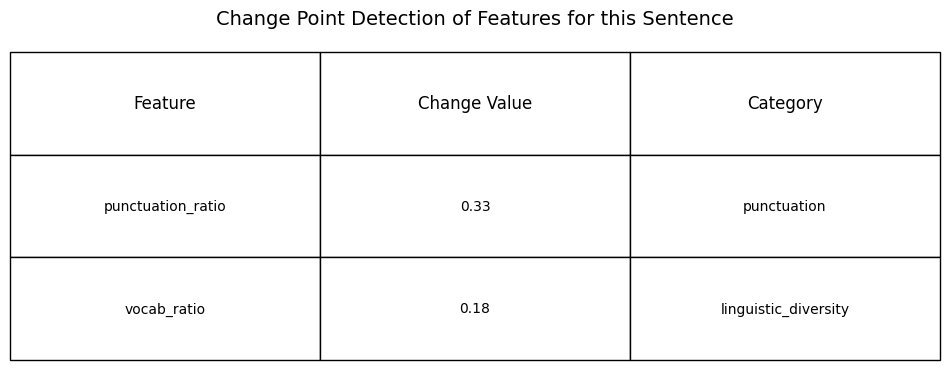

Change detected in sentence: As Reuters reported, even as Philippine authorities had filed several counts of money laundering, Guo continues to insist “she is natural-born Philippine citizen facing ‘malicious accusations,’ and had no knowledge of criminality.” This is strange because she could not even remember her roots, even her playmates while growing up.
Feature changes:


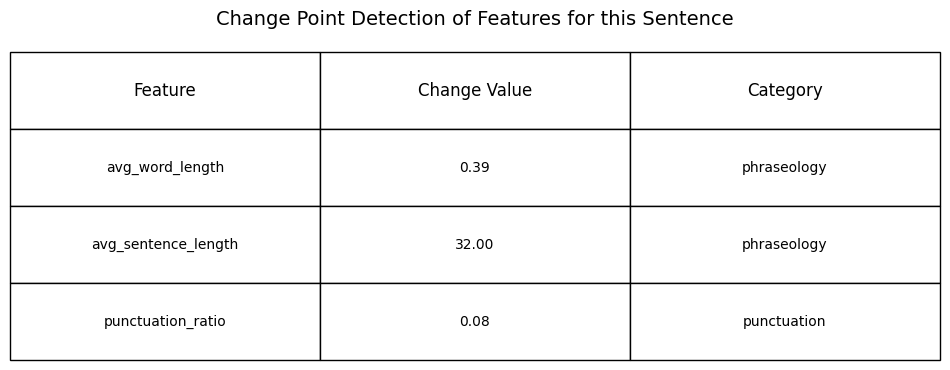

Change detected in sentence: There was little progress during the Senate hearing, notwithstanding the competent leadership of Senator Risa Hontiveros.
Feature changes:


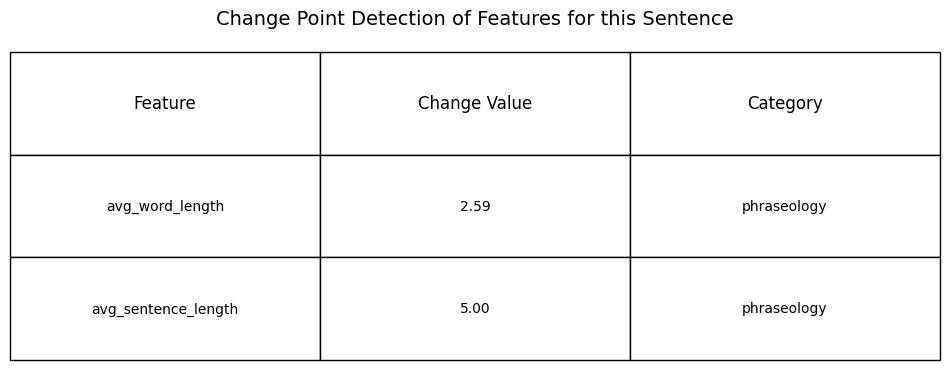


--- Percentage of Change by Category ---
Phraseology: 9.30% change detected out of 43 sentences.
Punctuation: 4.65% change detected out of 43 sentences.
Linguistic_diversity: 2.33% change detected out of 43 sentences.


In [14]:
new_text = """Disrespecting the law is no less than an act of insolence, and in the “Law Insider” formulation, that is arrogant, presumptuous, impudent, or in fact even insulting. It could even be at once rude because it is no less than the Philippine law that is being crushed. 

What Alice Guo did was a shameless disregard of the law, call it contempt of the law. If true, being non-Filipino made it worse, many times over. Of course, no less disrespectful of the law is how Apollo Quiboloy broke it by refusing to surrender to the authorities, until recently, despite the arrest warrant served to him in his own kingdom. 

Unfortunately, disrespect of the law, rather than the rule of law, has a long history in the Philippines.

The American expatriate businessman Harry Stonehill broke the law when he bribed high-level government officials in the early 1960s. His case also dragged at least three former presidents in order to protect his $50 million business in tobacco and various commercial crops, among others. Then Justice Secretary Jose W. Diokno caused the raid of the offices of 42 of Stonehill’s business establishments in 1962 and the arrest of Stonehill and some of his associates. 

Based on what was described as six army trucks worth of incriminating evidence, Stonehill was accused of tax evasion, economic sabotage, and various other charges that could have been established by his Blue Book which mysteriously went missing. It contained the names of Filipino politicians and government officials who were alleged to have received bribe money from the American businessman. Before the case could be tried in court, Stonehill was subsequently deported by Malacañang.

Alice Guo treated Philippine law like rag when all evidence points to her faking her birth circumstances to gain entry into the Philippines and become a Filipino citizen. If she is indeed non-Filipino and therefore disqualified, she violated our electoral law when she ran and took her oath of office as mayor of Bamban, Tarlac. This gains credence in the face of Guo’s fingerprints being a perfect match with a Chinese national, Guo Hua Ping. Guo could not explain how she was able to construct the multibillion building complex of POGO business in Tarlac. It was impossible because her tax returns and SALN could only support a modest lifestyle.

As Reuters reported, even as Philippine authorities had filed several counts of money laundering, Guo continues to insist “she is natural-born Philippine citizen facing ‘malicious accusations,’ and had no knowledge of criminality.” This is strange because she could not even remember her roots, even her playmates while growing up.

For weeks before she escaped from the Philippines to Malaysia, Singapore and Indonesia, our elected senators could not get through her. It was a blank wall for them when Guo would always retort that she grew up in a farm, her only close friends were the farmhands in their piggery, or when confronted by documentary evidence of her true nationality, that she could not remember anymore. 

The bigger picture is the undeniable involvement of those in authority. 

She could not have entered the Philippines without the complicity of our immigration authorities. She could not have produced her Filipino birth certificate without the knowledge of the civil registrar and the statistics authorities. She could not have run for public office if our election authorities conducted a simple due diligence. She could not have sustained her POGO and alleged illegal activities if law enforcers did not turn a blind eye. She could not have escaped from the Philippines in July without official intervention. 

It's a sad commentary that even notarization of public documents could be dragged into this scandal. As Rappler reported, a lawyer “committed lapses when he notarized the counter-affidavit of suspended Bamban Mayor Alice Guo in relation to a DOJ human trafficking complaint on Aug. 14.” By that time, Guo was already out of the country. 

When she was finally arrested by Indonesian Interpol in Tangerang, it was disclosed that a Singaporean national helped Guo book four hotel rooms in Batam island. And to the surprise of many, no less than Interior Secretary Benhur Abalos and PNP Chief PGen. Rommel Marbil who served the Senate arrest warrant to Guo. She was brought back to Manila in yes, a private plane. 

There was little progress during the Senate hearing, notwithstanding the competent leadership of Senator Risa Hontiveros. All that Guo had to do to frustrate the senators’ spirited questioning was to claim innocence, short memory or the risk of incriminating herself. 

If at all, Guo even taught the Senate what to do and this was to convert the public hearing into an executive session. Only then could she disclose to the Senate who engineered her escape. When the Senate refused, Guo was persuaded to write on a piece of paper the name of the person who helped her escape. By the disclosure of two senators, another non-Filipino disregarded the Senate arrest warrant by helping Guo and her siblings and associates avoid arrest through the southern backdoor. 

Nothing should surprise us anymore when non-Filipinos have the gall to disrespect our legal and justice system. We ourselves have nurtured such a habit of setting aside the law and just treating it as an elephant in the room, and in many cases, too, as a doormat.

This is in contrast to what the Philippines aspired for a “people-centered, clean and efficient governance” in the Philippine Development Plan 2017-2022. In Chapter 5, we as a people, expressed our adherence to a high-trust society where “citizens obey the law, they willingly pay the correct taxes trusting that government will prudently manage the fiscal resources.” 

Indeed, the cornerstone of a high-trust society is the trust in government. 

But we have doubt whether the plan to “enhance the social fabric by making government worthy of people’s trust” actually bore fruit given Alice’s tale in POGO land."""
author = "Diwa C. Guinigundo"
# predicted_author = classify_new_text(new_text, clf)

# print(f"The predicted author is: {predicted_author}")
changepoints, explanations = detect_change_points_in_text(new_text, author, clf)